# AI Project 5

In this project you will complete the provided Python code, using Tensorflow, to perform image classification on the Fashion-MNIST using various CNN architectures. 

## **Important!** 
Make sure you change your runtime type to GPU! This can be found in the top menu following "Runtime->Change runtime type" then select from the dropdown GPU.


## Imports, Data, and Hyperparameters

### Imports

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import numpy
import matplotlib.pyplot as plt

import time

print(tf.__version__)

2.4.1


### Data

In [11]:
data = tf.keras.datasets.fashion_mnist

# Separate data into train and test
(train_data, train_labels), (test_data, test_labels) = data.load_data()

# get info about data
train_size = len(train_data)
test_size = len(test_data)
data_shape = train_data[0].shape
num_classes = len(set(test_labels))

print(
    "There are ",
    train_size,
    " training examples and ",
    test_size,
    " testing examples with ",
    num_classes,
    " classes",
)

There are  60000  training examples and  10000  testing examples with  10  classes


### Preprocessing

In [12]:
print("Each image is of shape ", data_shape)

### Preproccess Data ###
train_data = train_data / 255
train_data = train_data.reshape(train_size, data_shape[0], data_shape[1], 1)
test_data = test_data / 255
test_data = test_data.reshape(test_size, data_shape[0], data_shape[1], 1)

data_shape = train_data[0].shape
print("New image shape is ", data_shape)

Each image is of shape  (28, 28)
New image shape is  (28, 28, 1)


### Global Hyperparameters

In [23]:
LEARNING_RATE = 0.0001
BATCH_SIZE = 32
EPOCHS = 5

## **Part 1 - The Effect of Filters**

In this section you will be comparing the relative performance and training times for two different CNN architectures. 

Both architectures will have the following layers in order:

``` Python
Conv2D <- input layer provided
Conv2D
MaxPooling2D((2,2))
Conv2D
Conv2D
MaxPooling2D((2,2))
Flatten
Dense(1024 nodes)
Dense(num_classes, softmax) <- output layer provided
```

The input layers and output layer will be provided. 

In ```build_model_1A()``` the first two Conv2D layers should have 16 filters, and the second two Conv2D layers should have 32 filters.

In ```build_model_1B()``` the first two Conv2d layers should have 64 filters, and the second two Conv2D layers should have 128 filters.

All layers, except the output layer which is provided, should have ```activation="relu"```. Also all the Conv2D layers should have ```padding="same"``` and ```kernel_size=(3,3)``` passed as parameters.

Only the first layer needs `input_shape` as an argument.

Finally both max pooling layers should have a pool size of (2, 2)

**Documentation for the each layer type:**

*Conv2D*: https://keras.io/api/layers/convolution_layers/convolution2d/

*MaxPooling2D*: https://keras.io/api/layers/pooling_layers/max_pooling2d/

*Flatten*: https://keras.io/api/layers/reshaping_layers/flatten/

*Dense*: https://keras.io/api/layers/core_layers/dense/

**Documentation for Sequential model**: https://keras.io/guides/sequential_model/

### ***TODO*** Model 1A

In [26]:
def build_model_1A():
  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=16,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
       layers.Conv2D(
           filters = 16, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.MaxPooling2D(
           pool_size=(2, 2)
       ),
       layers.Conv2D(
           filters = 32, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.Conv2D(
           filters = 32, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.MaxPooling2D(
           pool_size=(2, 2)
       ),
       layers.Flatten(),
       layers.Dense(1024, activation="relu"),

        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### ***TODO*** Model 1B

In [24]:
def build_model_1B():
  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
       layers.Conv2D(
           filters = 64, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Conv2D(
           filters = 128, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.Conv2D(
           filters = 128, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Flatten(),
       layers.Dense(1024, activation="relu"),
        # !!! Your layers here !!!
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### Model Compilation and Summaries

Compiles and prints summaries for the two architectures. Do not change.


In [25]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get networks
model_1a = build_model_1A() 
model_1b = build_model_1B()


# compile networks
model_1a.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model_1b.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summaries

print("\nModel 1A Architecture\n")
model_1a.summary()

print("\nModel 1B Architecture\n")
model_1b.summary()

NameError: ignored

### Testing Helper Method

Method to help with testing. Do not change


In [14]:
def perf_and_test(model, model_name):
  start = time.time()
  history = model.fit(train_data, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)
  print("\n" + model_name + " testing information\n")
  print("\nTraining took ", round((time.time() - start),2), "seconds\n")

  print("\nTesting statistics\n")
  test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

  fig,ax = plt.subplots()
  ax.plot(history.history['accuracy'],color="red")
  ax.set_xlabel("epoch",fontsize=14)
  ax.set_ylabel("accuracy", color="red", fontsize=14)
  ax2=ax.twinx()
  ax2.plot(history.history['loss'],color="blue")
  ax2.set_ylabel("loss", color="blue", fontsize=14)
  plt.title("Training Acc. and Loss: " + model_name)
  plt.show()

### ***TODO*** Global Hyperparameters

Start with a number of epochs that seems too high. After training, examine the loss plot to identify a point of diminishing returns in training, and then set the number of training epochs equal to that.

In [15]:
EPOCHS = 15

### Testing models

The following code cell will run both models and provided statistics for the training time, testing accuracy, and testing loss of the models. It also generates graphs for training accuracy and loss over time. These graphs can be used in your report.


In [9]:
### Model Compilation code included to allow for fresh reruns ###

tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get networks
model_1a = build_model_1A() 
model_1b = build_model_1B()


# compile networks
model_1a.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model_1b.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# test

perf_and_test(model_1a, "Model 1A")
perf_and_test(model_1b, "Model 1B")

NameError: ignored

## **Part 2 - Dropout Layers**

In part 2, we will be examining the effect of dropout layers on the performance of the model. Copy your code from the ```build_model_1B()``` method into the ```build_model_2()``` method, and then add dropout layers after each max pooling layer. Model 2 architecture should be:

```
Conv2D
Conv2D
MaxPooling2D((2,2))
Dropout(0.5) <- Add this
Conv2D
Conv2D
MaxPooling2D((2,2))
Dropout(0.5) <- Add this
Flatten
Dense(1024 nodes)
Dense(num_classes, softmax)
```

Note that the we are passing ```0.5``` as an argument to the dropout layers. This means that 50% of the connection between the max pooling and next layer will be dropped.

*Documentation on dropout layers can be found here*: https://keras.io/api/layers/regularization_layers/dropout/

### ***TODO*** Model 2

In [20]:
def build_model_2():

  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
      layers.Conv2D(
          filters = 64, 
          kernel_size = (3,3),
          activation = "relu",
          padding = "same",
      ),
      layers.MaxPooling2D(
          pool_size=(2, 2), 
      ),
      layers.Dropout(0.5),
      layers.Conv2D(
          filters = 128, 
          kernel_size = (3,3),
          activation = "relu",
          padding = "same",
      ),
      layers.Conv2D(
          filters = 128, 
          kernel_size = (3,3),
          activation = "relu",
          padding = "same",
      ),
      layers.MaxPooling2D(
          pool_size=(2, 2), 
      ),
      layers.Dropout(0.5),
      layers.Flatten(),
      layers.Dense(1024, activation="relu"),
        # !!! Your layers here !!!
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### Model Compilation and Summaries


In [21]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_2 = build_model_2() 

# compile network
model_2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summary

print("\nModel 2 Architecture\n")
model_2.summary()




Model 2 Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (Non

### **TODO** Global Hyperparameters

Dropout layers, while capable of making the model more robust, also require more training. You should again increase the number of epochs to find a point of diminishing returns.

In [24]:
EPOCHS = 15

### Testing Model 2

When looking at your results, pay attention to the difference between the training and test accuracy of Model 1B to the difference of the two accuracies in Model 2.

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.7928 - accuracy: 0.7095
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3814 - accuracy: 0.8618
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3081 - accuracy: 0.8862
Epoch 4/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2696 - accuracy: 0.9005
Epoch 5/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2427 - accuracy: 0.9098
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2224 - accuracy: 0.9182
Epoch 7/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2091 - accuracy: 0.9234
Epoch 8/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1955 - accuracy: 0.9288
Epoch 9/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1802 - accuracy: 0.9336
Epoch 10/15
1875/1875 [==============================] - 31s 16m

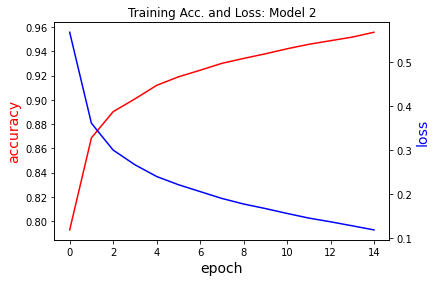

In [25]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_2 = build_model_2() 



# compile network
model_2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

perf_and_test(model_2, "Model 2")

## **Part 3 - Batch Normalization**

In part 3, we will be examining the effect of batch normalization layers on the performance of the model. Copy your code from the ```build_model_1B()``` method into the ```build_model_3()``` method, and then add batch normalization layers after each Conv2D layer. The Model 3 architecture should be:

```
Conv2D
BatchNormalization
Conv2D
BatchNormalization
MaxPooling2D((2,2))
Conv2D
BatchNormalization
Conv2D
BatchNormalization
MaxPooling2D((2,2))
Flatten
Dense(1024 nodes)
Dense(num_classes, softmax)
```
 BatchNormalization layers requires no parameters. 
 
 *Documentation can be found here*: https://keras.io/api/layers/normalization_layers/batch_normalization/

### ***TODO*** Model 3

In [18]:
def build_model_3():
  return tf.keras.Sequential(
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
        layers.BatchNormalization(),

       layers.Conv2D(
           filters = 64, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Conv2D(
           filters = 128, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.Conv2D(
           filters = 128, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),
       
       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Flatten(),
       layers.Dense(1024, activation="relu"),
        # !!! Your layers here !!!
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### Model Compilation and Summary



In [19]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_3 = build_model_3() 


# compile network
model_3.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summary

print("\nModel 3 Architecture\n")
model_3.summary()




Model 3 Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (Non

### ***TODO*** Global Hyperparameters
 
 Batch normalization has been shown to improve convergence in neural networks, and so the number of training epochs required may be lower than in the other architectures. Again refer to the initial loss plot to find the point of diminishing returns and update the ```EPOCHS``` variable.

In [20]:
EPOCHS = 5

In [21]:
def perf_and_test(model, model_name):
  start = time.time()
  history = model.fit(train_data, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)
  print("\n" + model_name + " testing information\n")
  print("\nTraining took ", round((time.time() - start),2), "seconds\n")

  print("\nTesting statistics\n")
  test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

  fig,ax = plt.subplots()
  ax.plot(history.history['accuracy'],color="red")
  ax.set_xlabel("epoch",fontsize=14)
  ax.set_ylabel("accuracy", color="red", fontsize=14)
  ax2=ax.twinx()
  ax2.plot(history.history['loss'],color="blue")
  ax2.set_ylabel("loss", color="blue", fontsize=14)
  plt.title("Training Acc. and Loss: " + model_name)
  plt.show()

### Testing Model 3


Epoch 1/5
1875/1875 [==============================] - 47s 8ms/step - loss: 0.4882 - accuracy: 0.8399
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2120 - accuracy: 0.9233
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1599 - accuracy: 0.9417
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1163 - accuracy: 0.9575
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0840 - accuracy: 0.9686

Model 3 testing information


Training took  104.37 seconds


Testing statistics

313/313 - 1s - loss: 0.2532 - accuracy: 0.9182


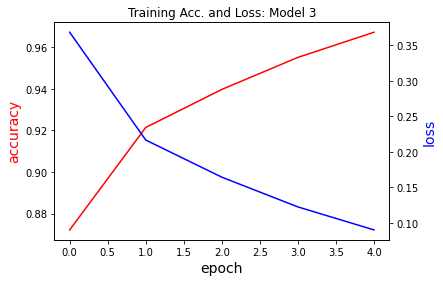

In [22]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_3 = build_model_3() 



# compile network
model_3.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

perf_and_test(model_3, "Model 3")

## **Part 4 - Layer count**

In the final part of this project, you will be looking out how the number of layers affect performance and training time.

In ```build_model_4```, you need to implement the following architecture:

```python
# block 1 - 64 filters per Conv2D
conv2D 
BatchNormaliztion
conv2D
BatchNormalization
conv2D
BatchNormalization
MaxPooling2D
Dropout(0.5)
#block 2 - 128 filters per Conv2D
conv2D 
BatchNormaliztion
conv2D
BatchNormalization
conv2D
BatchNormalization
MaxPooling2D
Dropout(0.5)
#block 3 - 256 filters per Conv2D
conv2D 
BatchNormaliztion
conv2D
BatchNormalization
conv2D
BatchNormalization
MaxPooling2D
Dropout(0.5)
# Dense layers
Flatten
Dense(1024)
Dense(512)
Dense(num_classes, softmax)
```

Notice each block consists of 3 conv2d layers, with 3 batch normalization layers, a maxpooling and dropout layer. The first block should have 64 filters for each Conv2d layer, the second should have 128 filters, and the third should have 256. Also, we are adding an additional dense layer with 512 nodes to the model architecture.

### ***TODO*** Model 4

In [33]:
def build_model_4():
  return tf.keras.Sequential(
      #BATCH1
      [layers.Conv2D( # <-- Input layer
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=data_shape,
        ),
        layers.BatchNormalization(),

       layers.Conv2D(
           filters = 64, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.Conv2D(
           filters = 64, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Dropout(0.5),

        #BATCH2
       layers.Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
        ),
        layers.BatchNormalization(),

       layers.Conv2D(
           filters = 128, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.Conv2D(
           filters = 128, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Dropout(0.5),
        

        #BATCH3
        layers.Conv2D( 
            filters=256,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
        ),
        layers.BatchNormalization(),

       layers.Conv2D(
           filters = 256, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.Conv2D(
           filters = 256, 
           kernel_size = (3,3),
           activation = "relu",
           padding = "same",
       ),
       layers.BatchNormalization(),

       layers.MaxPooling2D(
           pool_size=(2, 2), 
       ),
       layers.Dropout(0.5),


       

       layers.Flatten(),
       layers.Dense(1024, activation="relu"),
       layers.Dense(512, activation="relu"),

        # !!! Your layers here !!!
        layers.Dense(num_classes, activation="softmax")] # <-- Output layer
  )

### ***TODO*** Global Hyperparameters

Larger models generally require more training as there are more parameters, so you may need to increase the number of training epochs for this model. In addition, more complicated architectures and problem domains can benefit from lower learning rates. Experiment with the learning rate to see if you notice any improvements. Keep in mind that decreasing the learning rate increases the training time, and to fully train your model you may need to increase the number of epochs as well. 

In [41]:
EPOCHS = 25
LEARNING_RATE = 0.0025

### Model Compilation and Summary



In [42]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_4 = build_model_4() 


# compile network
model_4.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# print summary

print("\nModel 4 Architecture\n")
model_4.summary()




Model 4 Architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (Non

### Testing Model 4

This model will likely take considerably longer to train (10-30 minutes depending on number of epochs, and whichever GPU Colab assigned to your runtime) . It may be a good time to take a coffee break, or work on your report for a bit.


Epoch 1/25
1875/1875 [==============================] - 66s 34ms/step - loss: 1.0508 - accuracy: 0.7115
Epoch 2/25
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3860 - accuracy: 0.8620
Epoch 3/25
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3299 - accuracy: 0.8822
Epoch 4/25
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3195 - accuracy: 0.8866
Epoch 5/25
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2846 - accuracy: 0.8959
Epoch 6/25
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2561 - accuracy: 0.9072
Epoch 7/25
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2435 - accuracy: 0.9137
Epoch 8/25
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2264 - accuracy: 0.9182
Epoch 9/25
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2161 - accuracy: 0.9216
Epoch 10/25
1875/1875 [==============================] - 64s 34m

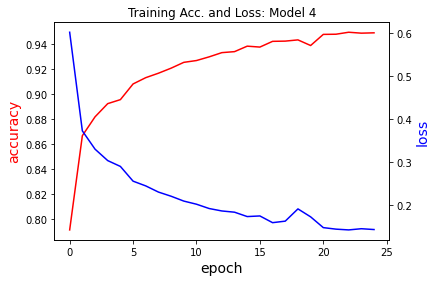

In [43]:
tf.keras.backend.clear_session() # clear previously compiled models

optimizer = optimizers.Adam(lr = LEARNING_RATE) # set optimizer

# get network
model_4 = build_model_4() 



# compile network
model_4.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

perf_and_test(model_4, "Model 4")